## Prepare Data 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import random
import math

import Data_preparation as DP
DP= DP.Data_preparation()

### Load the dataset

In [29]:
#load data from csv file
df=DP.load_csv_to_df("ricsData_big_v5.csv")
df.head()

,Rel_BreitGross,RelSpitze_oben,RelSpitze_unten,Anzahl_Linie,Anzahl_Ecken,Anzahl_Kreis,innere_Konturen,Label
0,0.288606,0.074919,0.618893,6,1,0,0.716694,0
1,0.494050,0.685185,0.634259,5,7,0,0.163891,0
2,0.497540,0.986384,0.989410,15,8,0,0.169400,0
3,0.480687,0.714286,0.592262,21,6,0,0.085573,0
4,0.322937,0.159763,0.633136,21,3,0,0.038672,0


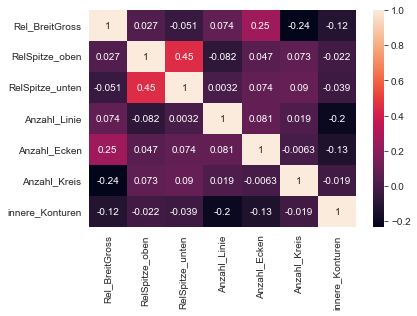

In [30]:
DP.draw_corr_matrix(df)

In [31]:
df=df[["Rel_BreitGross","RelSpitze_unten","Anzahl_Linie","Label"]]
X_train,X_test,y_train,y_test=DP.split_data(df,0.7)
df.head()

training set size: 564 samples 
test set size: 241 samples


,Rel_BreitGross,RelSpitze_unten,Anzahl_Linie,Label
0,0.288606,0.618893,6,0
1,0.494050,0.634259,5,0
2,0.497540,0.989410,15,0
3,0.480687,0.592262,21,0
4,0.322937,0.633136,21,0


In [32]:


import csv
import math
import random

""""
#Handle data
def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    next(lines)
    dataset=list(lines)
    for i in range(len(dataset)):
    		dataset[i] = [float(x) for x in dataset[i]]
    return dataset
"""
  
   

#Split dataset with ratio
def splitDataset(df, splitRatio):
    
	dataset=df.values.tolist()#only use this line if the data is not in list format 
	trainSize = int(len(dataset) * splitRatio)
	trainSet = []
	copy = list(dataset)
	while len(trainSet) < trainSize:
		index = random.randrange(len(copy))
		trainSet.append(copy.pop(index))
	return [trainSet, copy]



#Separate by Class
def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated



#Calculate Mean
def mean(numbers):
	return sum(numbers)/float(len(numbers))

def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)


#Summarize Dataset
def summarize(dataset):
	summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
	del summaries[-1]
	return summaries


#Summarize attributes by class
def summarizeByClass(dataset):
	separated = separateByClass(dataset)
	summaries = {}
	for classValue, instances in separated.items():
		summaries[classValue] = summarize(instances)
	return summaries


#Calculate Gaussian Probability Density Function
def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1/(math.sqrt(2*math.pi)*stdev))*exponent



#Calculate Class Probabilities
def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
		return probabilities



#Make a prediction
def predict(summaries, inputVector):
	probabilities = calculateClassProbabilities(summaries, inputVector)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel


#Get predictions

def getPredictions(summaries, testSet):
	predictions = []
	for i in range(len(testSet)):
		result = predict(summaries, testSet[i])
		predictions.append(result)
	return predictions

#Test predictions


#Get Accuracy
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet)))*100.0


def main():
	#filename = 'ricsBigData.csv'
	splitRatio = 0.8
	#dataset = loadCsv(filename)
	trainingSet, testSet = splitDataset(df, splitRatio)
	print('Split {0} rows into train = {1} and test = {2} rows'.format(len(df),len(trainingSet),len(testSet)))
	#prepare model
	summaries = summarizeByClass(trainingSet)
	#test model
	predictions = getPredictions(summaries, testSet)
	accuracy = getAccuracy(testSet, predictions)
	print('Accuracy: {0}%'.format(accuracy))

main()

Split 805 rows into train = 644 and test = 161 rows
Accuracy: 27.95031055900621%
